In [1]:
import tensorflow.compat.v1 as tf1
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
config = tf1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
session = tf1.Session(config=config)

2024-05-10 10:00:47.331357: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 10:00:49.058785: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-10 10:00:52.477718: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-05-10 10:00:52.477896: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = "/home/a202192006/kaggle(캐글)/범주형 데이터 이진분류(kaggle)/"

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submit = pd.read_csv(path + 'sample_submission.csv')

# data

In [3]:
def data_inform(df, df_name):
    print(f"--- {df_name} 데이터 프레임 정보 ---")
    print("데이터 타입 정보:")
    print(df.dtypes)
    print("\n결측값 개수:")
    print(df.isnull().sum())
    print("\n고윳값 개수:")
    print(df.nunique())
    print("\n실제값 예시:")
    print(df.head())
    print("\n데이터 종류:")
    print(df_name)


data_inform(train, "train")

--- train 데이터 프레임 정보 ---
데이터 타입 정보:
id         int64
bin_0      int64
bin_1      int64
bin_2      int64
bin_3     object
bin_4     object
nom_0     object
nom_1     object
nom_2     object
nom_3     object
nom_4     object
nom_5     object
nom_6     object
nom_7     object
nom_8     object
nom_9     object
ord_0      int64
ord_1     object
ord_2     object
ord_3     object
ord_4     object
ord_5     object
day        int64
month      int64
target     int64
dtype: object

결측값 개수:
id        0
bin_0     0
bin_1     0
bin_2     0
bin_3     0
bin_4     0
nom_0     0
nom_1     0
nom_2     0
nom_3     0
nom_4     0
nom_5     0
nom_6     0
nom_7     0
nom_8     0
nom_9     0
ord_0     0
ord_1     0
ord_2     0
ord_3     0
ord_4     0
ord_5     0
day       0
month     0
target    0
dtype: int64

고윳값 개수:
id        300000
bin_0          2
bin_1          2
bin_2          2
bin_3          2
bin_4          2
nom_0          3
nom_1          6
nom_2          6
nom_3          6
nom_4          4
nom_5  

In [6]:
def data_inform(df, df_name):
    print(f"--- {df_name} 데이터 프레임 정보 ---")
    print("데이터 타입 정보:")
    print(df.dtypes)
    print("\n결측값 개수:")
    print(df.isnull().sum())
    print("\n고윳값 개수:")
    print(df.nunique())
    print("\n실제값 예시:")
    print(df.head())
    print("\n데이터 종류:")
    print(df_name)

data_inform(test, "test")


--- test 데이터 프레임 정보 ---
데이터 타입 정보:
id        int64
bin_0     int64
bin_1     int64
bin_2     int64
bin_3    object
bin_4    object
nom_0    object
nom_1    object
nom_2    object
nom_3    object
nom_4    object
nom_5    object
nom_6    object
nom_7    object
nom_8    object
nom_9    object
ord_0     int64
ord_1    object
ord_2    object
ord_3    object
ord_4    object
ord_5    object
day       int64
month     int64
dtype: object

결측값 개수:
id       0
bin_0    0
bin_1    0
bin_2    0
bin_3    0
bin_4    0
nom_0    0
nom_1    0
nom_2    0
nom_3    0
nom_4    0
nom_5    0
nom_6    0
nom_7    0
nom_8    0
nom_9    0
ord_0    0
ord_1    0
ord_2    0
ord_3    0
ord_4    0
ord_5    0
day      0
month    0
dtype: int64

고윳값 개수:
id       200000
bin_0         2
bin_1         2
bin_2         2
bin_3         2
bin_4         2
nom_0         3
nom_1         6
nom_2         6
nom_3         6
nom_4         4
nom_5       222
nom_6       522
nom_7      1219
nom_8      2214
nom_9     11839
ord_0         3


In [5]:
train = train.drop('id', axis=1)

train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [6]:
test = test.drop('id', axis=1)

test.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
1,0,0,0,T,N,Red,Square,Lion,Canada,Piano,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
2,1,0,1,F,Y,Blue,Square,Dog,China,Piano,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
3,0,0,1,T,Y,Red,Star,Cat,China,Piano,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
4,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


In [9]:
for column in test.columns:
    if test[column].dtype == 'object' and column != 'target':
        le = LabelEncoder()
        test[column] = le.fit_transform(test[column])
        label_encoders[column] = le
test.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,1,1,1,0,5,0,3,2,...,1367,2789,2,4,5,9,15,95,5,11
1,0,0,0,1,0,2,2,4,0,2,...,596,1879,1,3,4,11,0,61,7,5
2,1,0,1,0,1,0,2,2,1,2,...,1570,5123,2,1,2,0,6,172,1,12
3,0,0,1,1,1,2,3,1,1,2,...,107,8365,1,0,4,1,16,135,2,3
4,0,1,1,0,0,2,4,2,1,2,...,2155,6903,3,2,4,11,22,157,4,11


# kaggle share code

In [13]:
y_train=train['target']

0         0
1         0
2         0
3         1
4         0
         ..
299995    0
299996    0
299997    1
299998    1
299999    0
Name: target, Length: 300000, dtype: int64

In [14]:
train=train[list(test)]

In [19]:
all_data=pd.concat((train, test))

In [20]:
encoded = pd.get_dummies(all_data, columns=all_data.columns, sparse=True)
encoded = encoded.sparse.to_coo()
encoded = encoded.tocsr()

In [22]:
X_train = encoded[:len(train)]
X_test = encoded[len(train):]

In [26]:
kf = StratifiedKFold(n_splits=10)

In [29]:
def objective(trial):
    C=trial.suggest_loguniform('C', 10e-10, 10)
    model=LogisticRegression(C=C, class_weight='balanced',max_iter=10000, solver='lbfgs', n_jobs=-1)
    score=-cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc').mean()
    return score

study=optuna.create_study()

[I 2024-05-09 23:23:03,527] A new study created in memory with name: no-name-ea4a16c2-b7c7-41bc-a7f5-49c27c30f57a


In [ ]:
study.optimize(objective, n_trials=50)

/tmp/ipykernel_189915/2018375972.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C=trial.suggest_loguniform('C', 10e-10, 10)


In [8]:
print(study.best_params)
print(-study.best_value)
params=study.best_params

Trial Resulted in Value : C = 0.09536298444122952

In [28]:
model=LogisticRegression(C=0.09536298444122952, class_weight='balanced',max_iter=10000, solver='lbfgs', n_jobs=-1)
model.fit(train_X, train_y)
predictions=model.predict_proba(test_X)[:,1]
submission['target']=predictions
submission.to_csv('Result.csv')
submission.head()

,target
id,
300000,0.542989
300001,0.823504
300002,0.235258
300003,0.615001
300004,0.933766


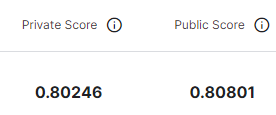

# 로지스틱 회귀(정수형라벨인코드)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression

label_encoders = {}
for column in train.columns:
    if train[column].dtype == 'object' and column != 'target':
        le = LabelEncoder()
        train[column] = le.fit_transform(train[column])
        label_encoders[column] = le
        

X = train.drop('target', axis=1)
y = train['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LogisticRegression(C=0.09536298444122952, max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(C=0.09536298444122952, max_iter=1000)

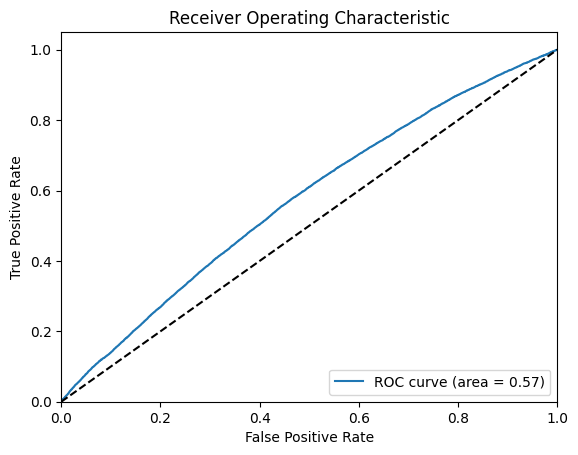

In [12]:
y_pred_proba = model.predict_proba(X_test)[:,1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)


plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 데이터 전처리 후 로지스틱 회귀

id 컬럼의 고유값 개수: 300000


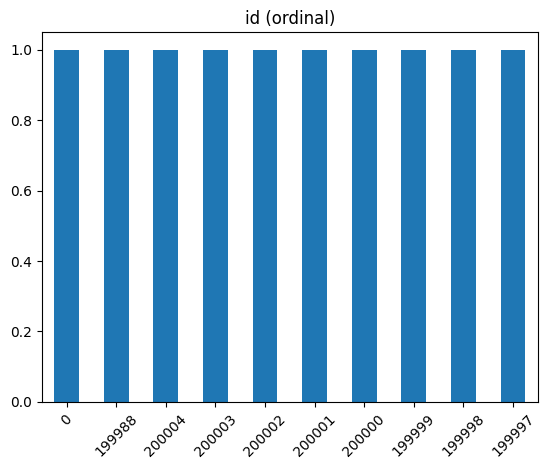

bin_0 컬럼의 고유값 개수: 2


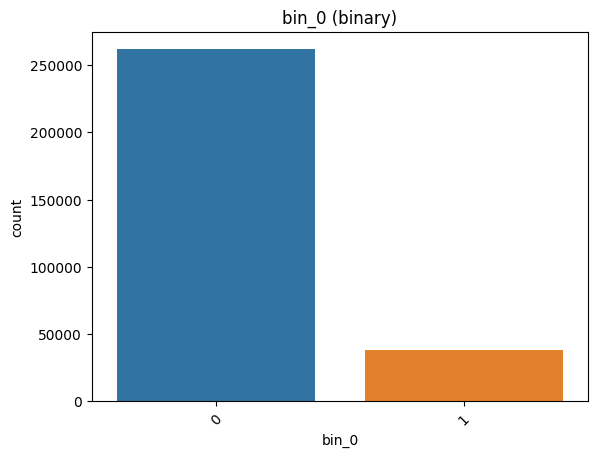

bin_1 컬럼의 고유값 개수: 2


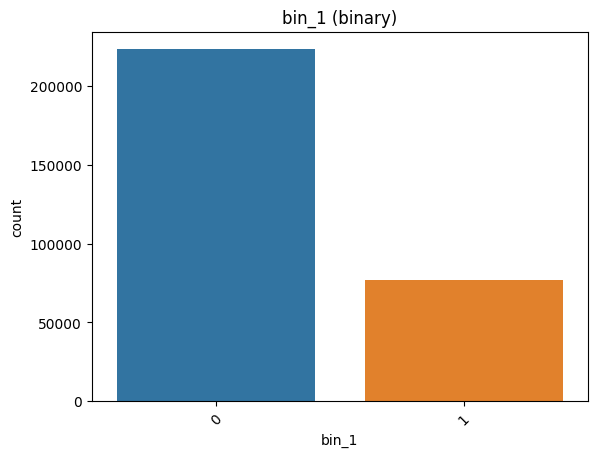

bin_2 컬럼의 고유값 개수: 2


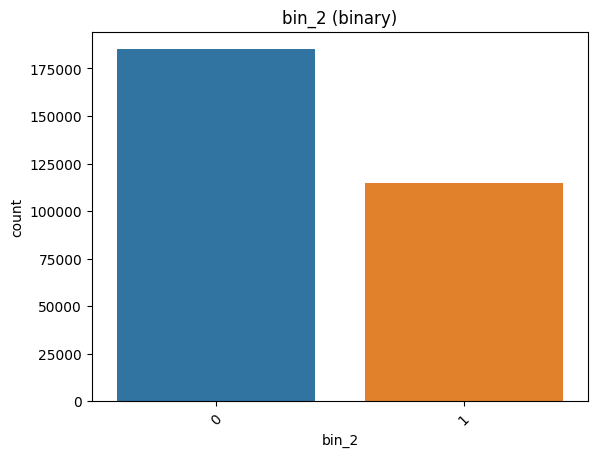

bin_3 컬럼의 고유값 개수: 2


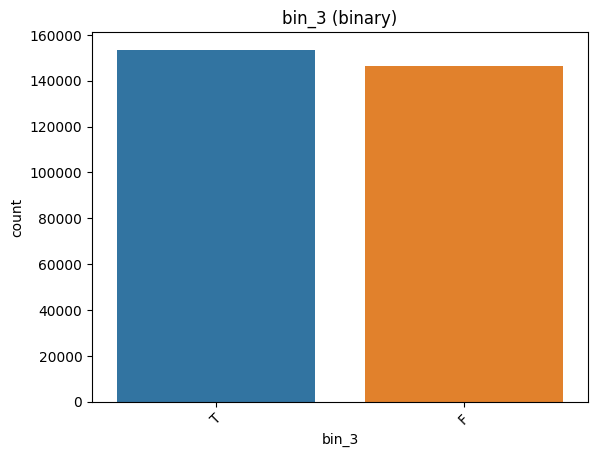

bin_4 컬럼의 고유값 개수: 2


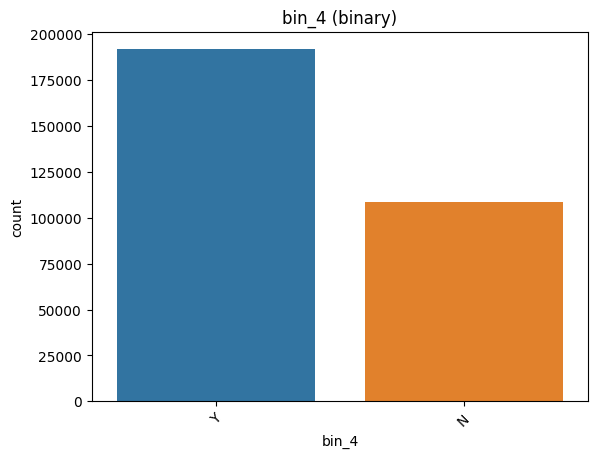

nom_0 컬럼의 고유값 개수: 3


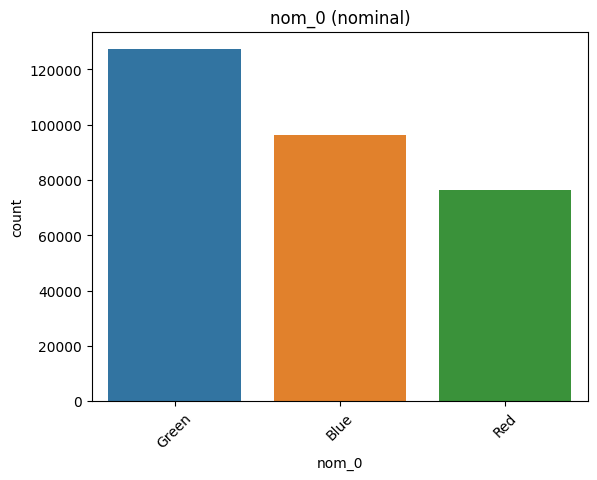

nom_1 컬럼의 고유값 개수: 6


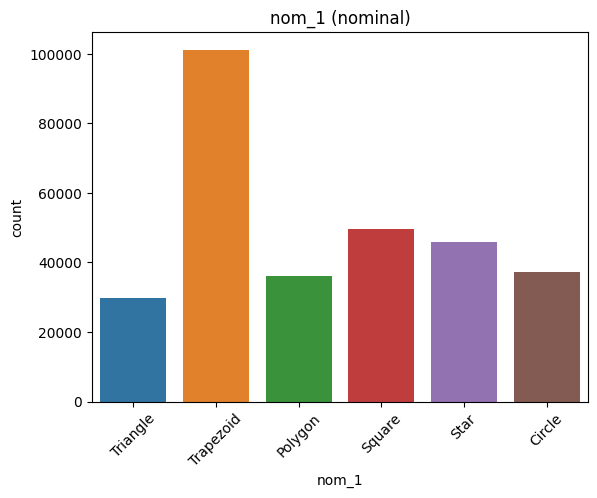

nom_2 컬럼의 고유값 개수: 6


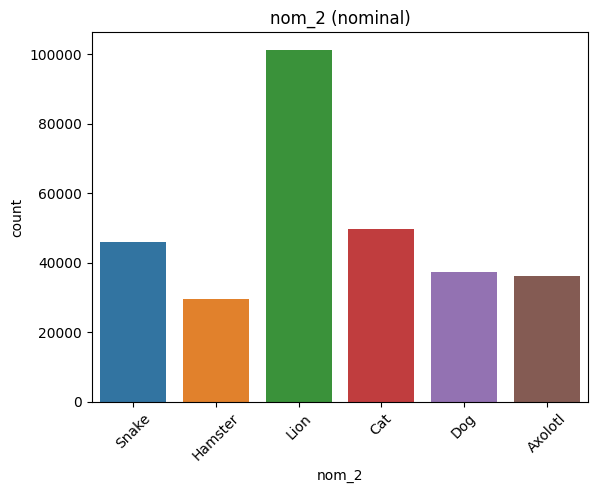

nom_3 컬럼의 고유값 개수: 6


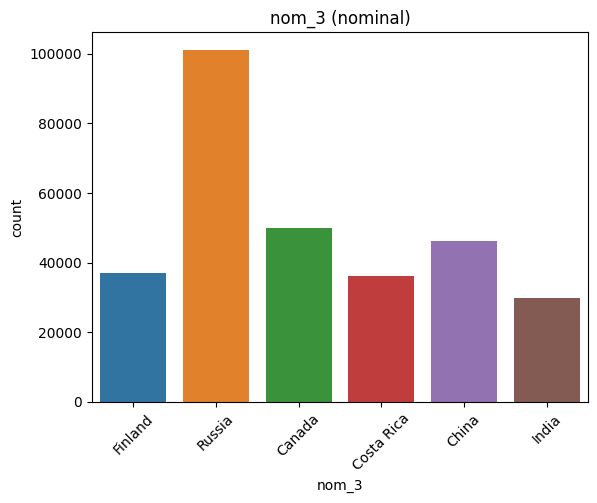

nom_4 컬럼의 고유값 개수: 4


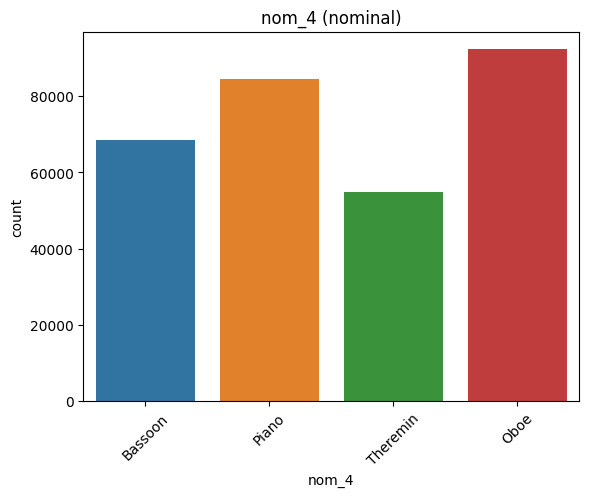

nom_5 컬럼의 고유값 개수: 222


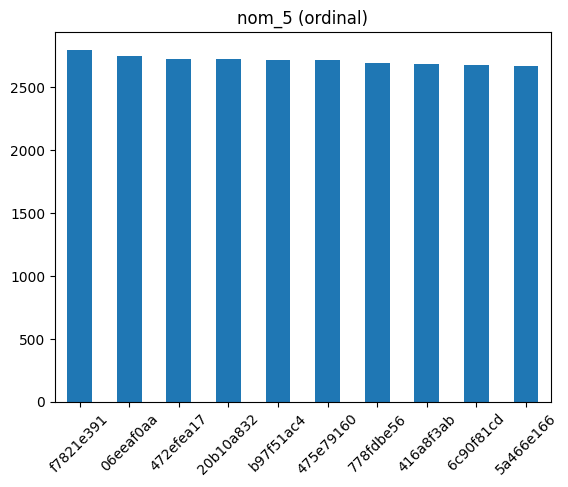

nom_6 컬럼의 고유값 개수: 522


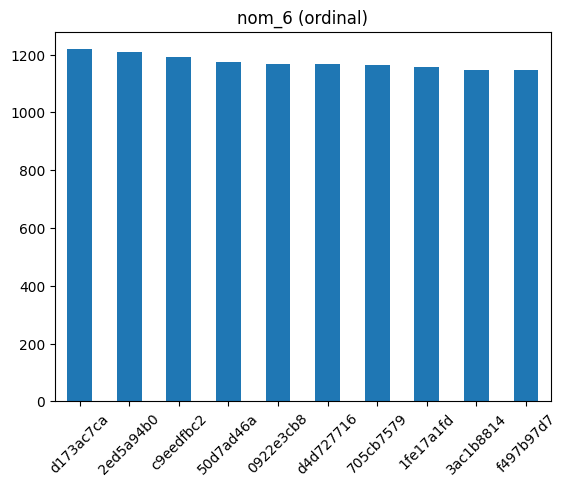

nom_7 컬럼의 고유값 개수: 1220


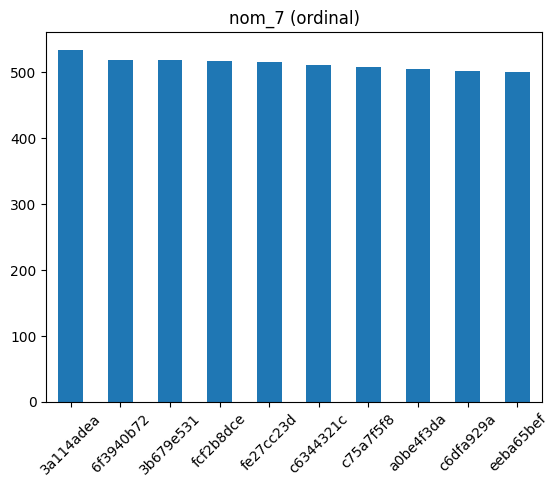

nom_8 컬럼의 고유값 개수: 2215


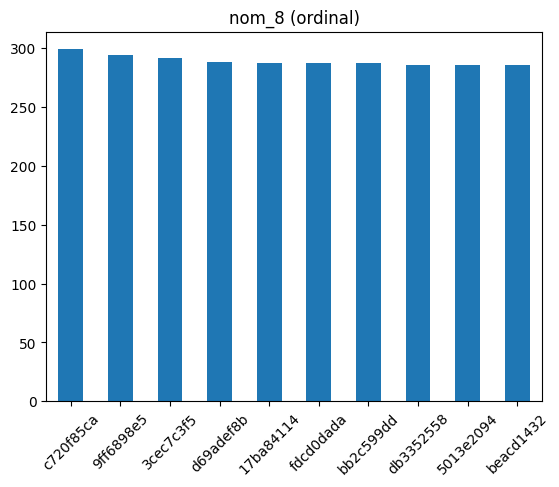

nom_9 컬럼의 고유값 개수: 11981


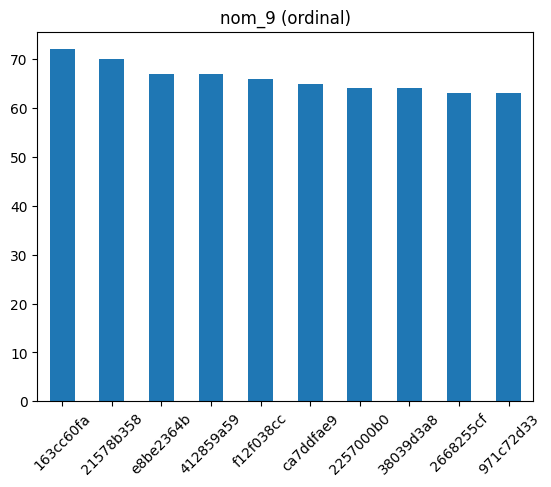

ord_0 컬럼의 고유값 개수: 3


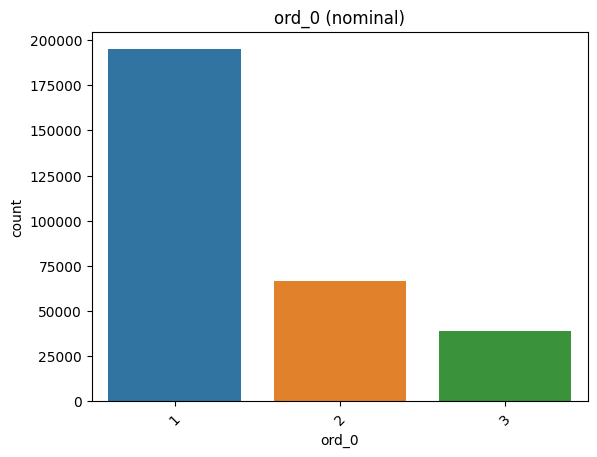

ord_1 컬럼의 고유값 개수: 5


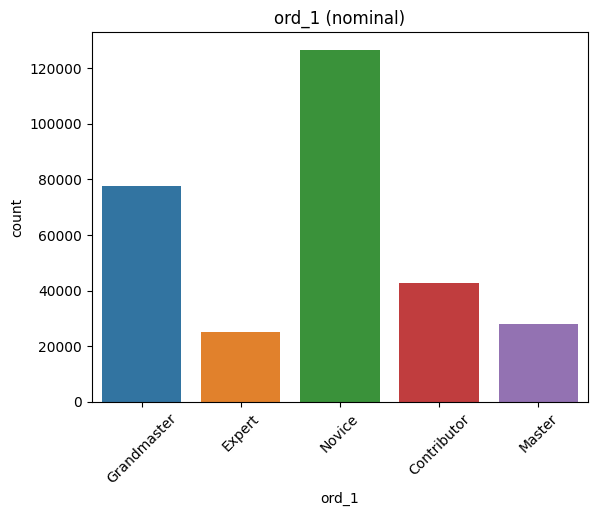

ord_2 컬럼의 고유값 개수: 6


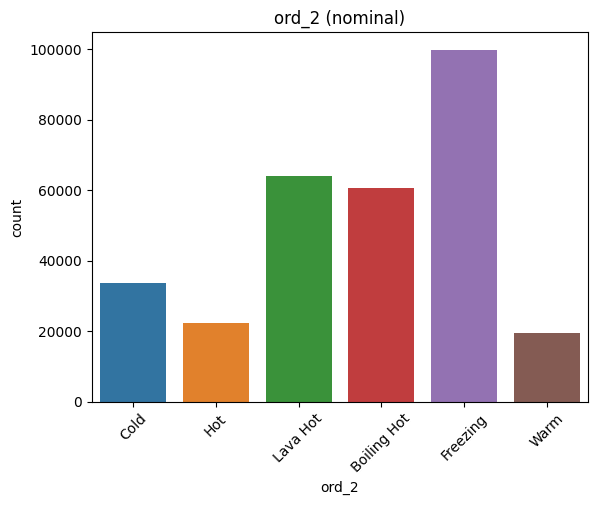

ord_3 컬럼의 고유값 개수: 15


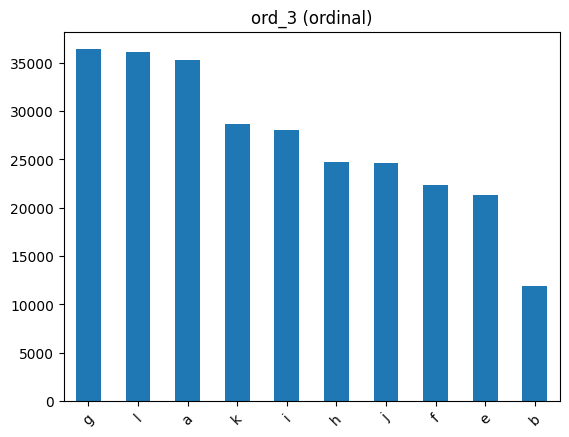

ord_4 컬럼의 고유값 개수: 26


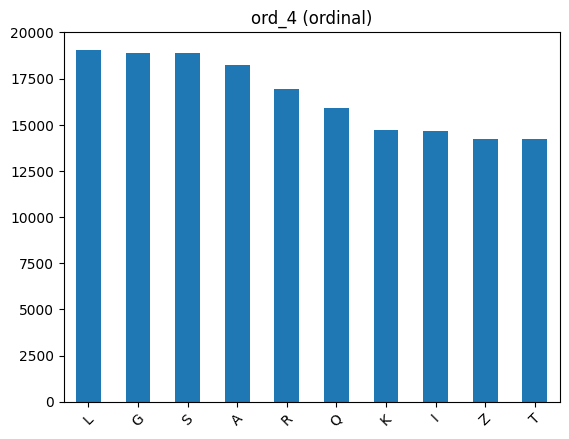

ord_5 컬럼의 고유값 개수: 192


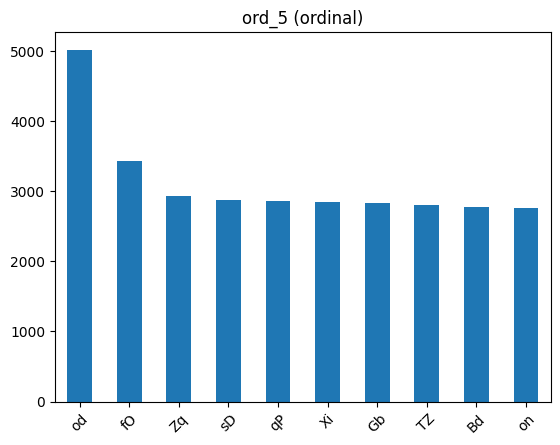

day 컬럼의 고유값 개수: 7


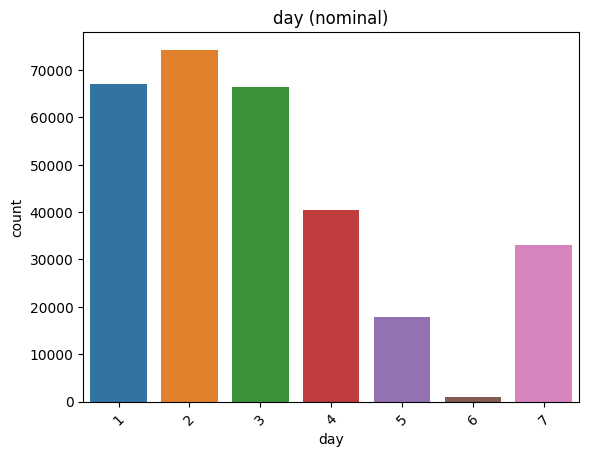

month 컬럼의 고유값 개수: 12


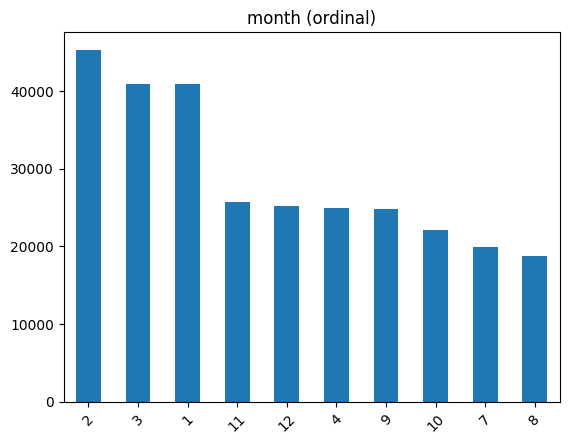

target 컬럼의 고유값 개수: 2


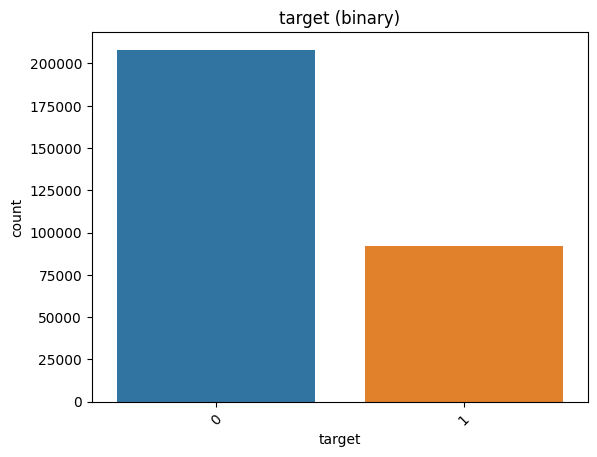

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


for column in train.columns:
    unique_values = train[column].nunique()
    print(f"{column} 컬럼의 고유값 개수: {unique_values}")

    
    if unique_values == 2:
        sns.countplot(x=column, data=train)
        plt.title(f'{column} (binary)')
    
  
    elif unique_values <= 10:
        sns.countplot(x=column, data=train)
        plt.title(f'{column} (nominal)')
    
    
    else:
        train[column].value_counts().nlargest(10).plot(kind='bar')
        plt.title(f'{column} (ordinal)')

    plt.xticks(rotation=45)
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
import pandas as pd


# 그리드 서치를 통한 모델 튜닝
model = LogisticRegression(random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # 정규화 강도
    'class_weight': [{0: 1, 1: w} for w in [1, 1.4, 2]],  # 클래스 가중치
    'solver': ['liblinear', 'newton-cg', 'lbfgs'],  # 최적화 알고리즘
    'penalty': ['l1', 'l2']  # 규제 유형
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_transformed, y_train)

# 최적의 모델과 매개변수 출력
print("Best parameters:", grid_search.best_params_)

/home/a202192006/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/a202192006/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

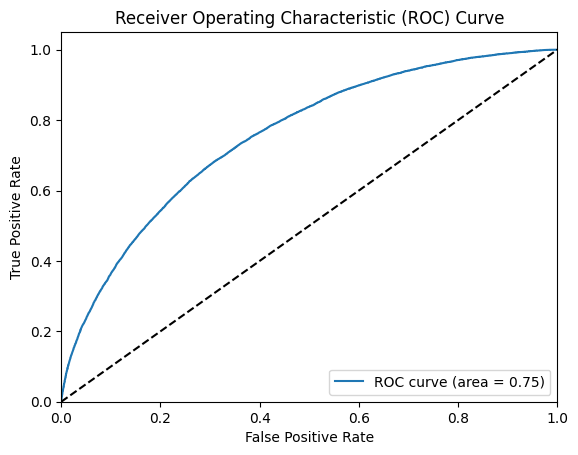

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

def prepare_data(df):
    binary_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'] #이진수
    nominal_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9'] # 명목형
    ordinal_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month'] # 순서로써의 의미
    
    X = df.drop(columns=['target'])
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    rare_threshold = 3 
    
    for feature in ['nom_7', 'nom_8', 'nom_9']:
        common_values = set(X_train[feature].value_counts()[X_train[feature].value_counts() >= rare_threshold].index)
        X_train.loc[~X_train[feature].isin(common_values), feature] = 'other'
        X_test.loc[~X_test[feature].isin(common_values), feature] = 'other'
    
    # 데이터 전처리
    nominal_features_encoded = [f for f in nominal_features if f not in ['nom_7', 'nom_8', 'nom_9']]
    column_transformer = ColumnTransformer([
        ('binary_encoder', 'passthrough', binary_features),   # 이진 변수는 변환 없이 그대로 사용
        ('nominal_encoder', OneHotEncoder(handle_unknown='ignore'), nominal_features_encoded), # 명목 변수에 대해 One-Hot Encoding 사용
        ('ordinal_encoder', OrdinalEncoder(), ordinal_features)# 순서 변수에 대해 Ordinal Encoding 사용(순서 부여)
    ]) 
    
    
    model = LogisticRegression(C=0.095, class_weight={0: 1, 1: 1.4}, tol=0.00001,
                                solver='liblinear', penalty='l2', random_state=42)
    
    
    pipeline = Pipeline([
        ('preprocessor', column_transformer),
        ('classifier', model)
    ])
    
    
    pipeline.fit(X_train, y_train)
    
    
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return pipeline


model_pipeline = prepare_data(train)

# DNN

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
train['target'] = label_encoder.fit_transform(train['target'])

X = train.drop('target', axis=1)
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) # 입력 차원은 X_train의 특성 수와 동일
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 이진 분류를 위한 활성화 함수

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2024-05-10 10:01:34.684777: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20169 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:3b:00.0, compute capability: 8.0


In [4]:
model.fit(X_train, y_train, epochs=100, batch_size=10)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
y_pred_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pre = model.predict(test)

In [25]:
submit['target']= pre
submit.to_csv('DNN.csv',index = False, quoting = 3)
submit.head()

,id,target
0,300000,0.465325
1,300001,0.256317
2,300002,0.398724
3,300003,0.473547
4,300004,0.829428


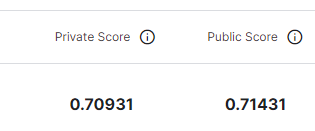